In [27]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('data/titanic'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


data/titanic\gender_submission.csv
data/titanic\test.csv
data/titanic\train.csv


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
df_train=pd.read_csv('data/titanic/train.csv')
df_test=pd.read_csv('data/titanic/test.csv')

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_train['Age'].fillna( df_train['Age'].median(), inplace=True )
df_train['Embarked'].fillna('S', inplace=True)

df_test['Age'].fillna(df_test['Age'].median(), inplace=True)
df_test['Embarked'].fillna('S', inplace=True)
df_test['Fare'].fillna(df_test['Fare'].median(), inplace=True)

X_train = df_train.drop(columns=['Survived','Name','Cabin','Ticket'])
df_test.drop(columns=['Name','Cabin','Ticket'], inplace=True)
Y_train=df_train['Survived']
X_train

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,male,22.0,1,0,7.2500,S
1,2,1,female,38.0,1,0,71.2833,C
2,3,3,female,26.0,0,0,7.9250,S
3,4,1,female,35.0,1,0,53.1000,S
4,5,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,887,2,male,27.0,0,0,13.0000,S
887,888,1,female,19.0,0,0,30.0000,S
888,889,3,female,28.0,1,2,23.4500,S
889,890,1,male,26.0,0,0,30.0000,C


In [6]:
le=preprocessing.LabelEncoder()
X_train[['Sex']] = le.fit_transform( X_train[['Sex']] )
df_test[['Sex']] = le.transform( df_test[['Sex']] )
df_test

C:\Users\Tim\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.5,0,0,7.8292,Q
1,893,3,0,47.0,1,0,7.0000,S
2,894,2,1,62.0,0,0,9.6875,Q
3,895,3,1,27.0,0,0,8.6625,S
4,896,3,0,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,1305,3,1,27.0,0,0,8.0500,S
414,1306,1,0,39.0,0,0,108.9000,C
415,1307,3,1,38.5,0,0,7.2500,S
416,1308,3,1,27.0,0,0,8.0500,S


In [14]:
X_train['Embarked'] = le.fit_transform(X_train[['Embarked']])
X_train

C:\Users\Tim\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,1,22.0,1,0,7.2500,2
1,2,1,0,38.0,1,0,71.2833,0
2,3,3,0,26.0,0,0,7.9250,2
3,4,1,0,35.0,1,0,53.1000,2
4,5,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,887,2,1,27.0,0,0,13.0000,2
887,888,1,0,19.0,0,0,30.0000,2
888,889,3,0,28.0,1,2,23.4500,2
889,890,1,1,26.0,0,0,30.0000,0


In [10]:
X_train['Embarked'][X_train['Embarked'].notnull()] = le.fit_transform(X_train[['Embarked']][X_train['Embarked'].notnull()])
df_test['Embarked'][df_test['Embarked'].notnull()] = le.transform(df_test[['Embarked']][df_test['Embarked'].notnull()])

X_train

0      True
1      True
2      True
3      True
4      True
       ... 
886    True
887    True
888    True
889    True
890    True
Name: Embarked, Length: 891, dtype: bool

In [33]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


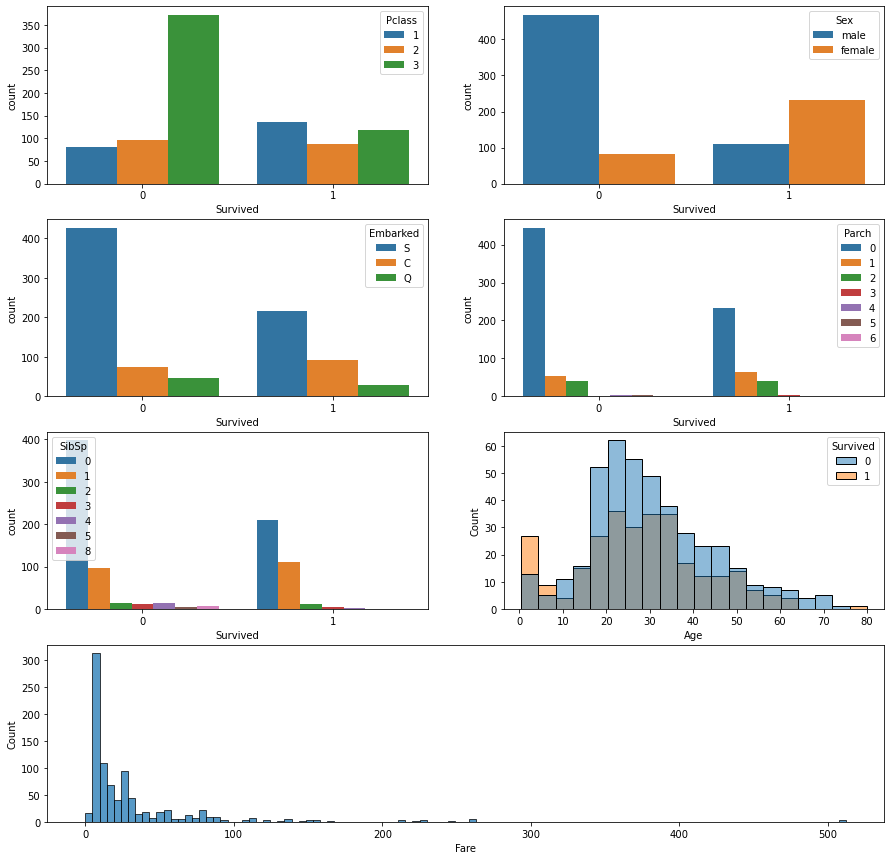

In [34]:
fig, axs = plt.subplots(4,2, figsize=(15,15))

sns.countplot(ax=axs[0,0], x="Survived",hue="Pclass",data=df)
sns.countplot(ax=axs[0,1], x="Survived",hue="Sex",data=df)
sns.countplot(ax=axs[1,0], x="Survived",hue="Embarked",data=df)
sns.countplot(ax=axs[1,1], x="Survived",hue="Parch",data=df)
sns.countplot(ax=axs[2,0], x="Survived",hue="SibSp",data=df)
sns.histplot(ax=axs[2,1], x="Age", hue="Survived", data=df)

ax1=plt.subplot(414)
sns.histplot(ax=ax1, x="Fare", data=df)

plt.show()

<ipython-input-35-98b5ba546065>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df.drop(columns=["PassengerId","Name"]).corr(), dtype=np.bool))


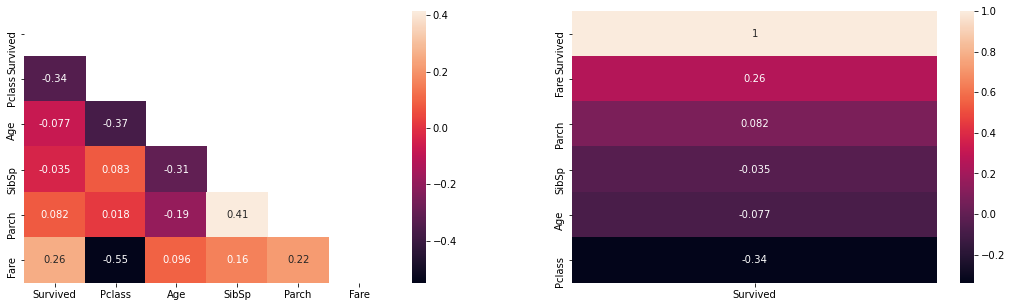

In [35]:
fig, axs = plt.subplots(1,2, figsize=(18,5))

mask = np.triu(np.ones_like(df.drop(columns=["PassengerId","Name"]).corr(), dtype=np.bool))
sns.heatmap(df.drop(columns=["PassengerId","Name"]).corr(), annot=True, mask=mask, ax=axs[0])
sns.heatmap(df.drop(columns=["PassengerId","Name"]).corr()[['Survived']].sort_values(by='Survived', ascending=False), annot=True, ax=axs[1])

plt.show()

In [36]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna('S', inplace=True)

df_test['Age'].fillna(df_test['Age'].median(), inplace=True)
df_test['Embarked'].fillna('S', inplace=True)
df_test['Fare'].fillna(df_test['Fare'].median(), inplace=True)

X_train=df.drop(columns=['Survived','Name','Cabin','Ticket'])
df_test.drop(columns=['Name','Cabin','Ticket'], inplace=True)
Y_train=df['Survived']
X_train

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,male,22.0,1,0,7.2500,S
1,2,1,female,38.0,1,0,71.2833,C
2,3,3,female,26.0,0,0,7.9250,S
3,4,1,female,35.0,1,0,53.1000,S
4,5,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,887,2,male,27.0,0,0,13.0000,S
887,888,1,female,19.0,0,0,30.0000,S
888,889,3,female,28.0,1,2,23.4500,S
889,890,1,male,26.0,0,0,30.0000,C


In [37]:
le=preprocessing.LabelEncoder()

X_train[['Sex']]=le.fit_transform(X_train[['Sex']])
df_test[['Sex']]=le.transform(df_test[['Sex']])

X_train['Embarked'][X_train['Embarked'].notnull()]=le.fit_transform(X_train[['Embarked']][X_train['Embarked'].notnull()])
df_test['Embarked'][df_test['Embarked'].notnull()]=le.transform(df_test[['Embarked']][df_test['Embarked'].notnull()])

X_train

C:\Users\Tim\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
<ipython-input-37-dd244cd8b51b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Embarked'][X_train['Embarked'].notnull()]=le.fit_transform(X_train[['Embarked']][X_train['Embarked'].notnull()])
<ipython-input-37-dd244cd8b51b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Embarked'][df_test['Embarked'].notnull()]=le.transform(df_test[['Embarked']]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,1,22.0,1,0,7.2500,2
1,2,1,0,38.0,1,0,71.2833,0
2,3,3,0,26.0,0,0,7.9250,2
3,4,1,0,35.0,1,0,53.1000,2
4,5,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,887,2,1,27.0,0,0,13.0000,2
887,888,1,0,19.0,0,0,30.0000,2
888,889,3,0,28.0,1,2,23.4500,2
889,890,1,1,26.0,0,0,30.0000,0


In [38]:
 df_test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.5,0,0,7.8292,1
1,893,3,0,47.0,1,0,7.0000,2
2,894,2,1,62.0,0,0,9.6875,1
3,895,3,1,27.0,0,0,8.6625,2
4,896,3,0,22.0,1,1,12.2875,2
...,...,...,...,...,...,...,...,...
413,1305,3,1,27.0,0,0,8.0500,2
414,1306,1,0,39.0,0,0,108.9000,0
415,1307,3,1,38.5,0,0,7.2500,2
416,1308,3,1,27.0,0,0,8.0500,2


In [39]:
train_x, test_x, train_y, test_y = train_test_split(X_train, Y_train, test_size=0.3)

clf=DecisionTreeClassifier()
clf.fit(train_x,train_y)
pred_y=clf.predict(test_x)

print("Accuracy:",metrics.accuracy_score(test_y, pred_y))
print("F1:",metrics.f1_score(test_y, pred_y))

pred_y=clf.predict(df_test)
result=pd.DataFrame()
result['PassengerId']=df_test['PassengerId']
result['Survived']=pred_y


Accuracy: 0.7611940298507462
F1: 0.6767676767676767


In [40]:
train_x, test_x, train_y, test_y = train_test_split(X_train, Y_train, test_size=0.3)

clf=RandomForestClassifier(n_estimators=30)
clf.fit(train_x,train_y)
pred_y=clf.predict(test_x)

print("Accuracy:",metrics.accuracy_score(test_y, pred_y))
print("F1:",metrics.f1_score(test_y, pred_y))

pred_y=clf.predict(df_test)
result=pd.DataFrame()
result['PassengerId']=df_test['PassengerId']
result['Survived']=pred_y

Accuracy: 0.8246268656716418
F1: 0.7344632768361583


In [ ]:
train_x, test_x, train_y, test_y = train_test_split(X_train, Y_train, test_size=0.3)

clf=LogisticRegression(penalty="l1",solver='liblinear', random_state=1)
clf.fit(train_x,train_y)
pred_y=clf.predict(test_x)

print("Accuracy:",metrics.accuracy_score(test_y, pred_y))
print("F1:",metrics.f1_score(test_y, pred_y))

pred_y=clf.predict(df_test)
result=pd.DataFrame()
result['PassengerId']=df_test['PassengerId']
result['Survived']=pred_y